<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/5%2520-%2520Reti%2520Neurali%2520Convoluzionali/convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ConvNet: Reti Neurali Convoluzionali

In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from cv2 import resize

In [2]:
dataset = tfds.load('malaria', split='train', shuffle_files=True)

In [3]:
NUM_SAMPLES = 10000
IMG_SIZE = (128, 128)

In [4]:
def load_data(dataset, num_samples=None):
  images = []
  labels = []

  for i, example in enumerate(tfds.as_numpy(dataset)):

    if(num_samples!=None and i>=num_samples):
      break

    img = example["image"]
    img = resize(img, IMG_SIZE)
    images.append(img)
    labels.append(example["label"])

  images = np.array(images)
  labels = np.array(labels)

  return images, labels

images, labels = load_data(dataset, num_samples=NUM_SAMPLES)
num_classes = np.unique(labels).shape[0]

0


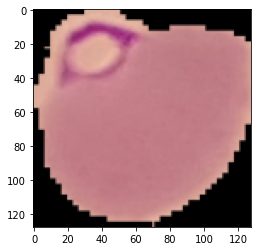

In [5]:
plt.imshow(images[0])
print(labels[0])

In [6]:
X = images/255
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Rete Neurale

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       104       
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 131073    
Total params: 131,177
Trainable params: 131,177
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
16/16 [==============================] - 2s 128ms/step - loss: 4.0867 - accuracy: 0.5035
Epoch 2/10
16/16 [==============================] - 2s 110ms/step - loss: 1.4719 - accuracy: 0.5322
Epoch 3/10
16/16 [==============================] - 2s 109ms/step - loss: 0.8465 - accuracy: 0.5691
Epoch 4/10
16/16 [==============================] - 2s 105ms/step - loss: 0.6960 - accuracy: 0.6087
Epoch 5/10
16/16 [==============================] - 2s 111ms/step - loss: 0.6075 - accuracy: 0.6668
Epoch 6/10
16/16 [==============================] - 2s 108ms/step - loss: 0.5727 - accuracy: 0.7166
Epoch 7/10
16/16 [==============================] - 2s 106ms/step - loss: 0.5563 - accuracy: 0.7256
Epoch 8/10
16/16 [==============================] - 2s 112ms/step - loss: 0.5280 - accuracy: 0.7667
Epoch 9/10
16/16 [==============================] - 2s 111ms/step - loss: 0.5046 - accuracy: 0.7747
Epoch 10/10
16/16 [==============================] - 2s 111ms/step - loss: 0.4762 - accuracy: 0.8204

In [ ]:
metrics_train = model.evaluate(X_train, y_train, verbose=0)
print("Train Set: Accuracy=%.2f, Log Loss=$.4f" % (metrics_train[1], metrics_train[0]))

In [ ]:
metrics_test = model.evaluate(X_test, y_test, verose=0)
print("Test Set: Accuracy=%.2f, Log Loss=$.4f" % (metrics_test[1], metrics_test[0]))

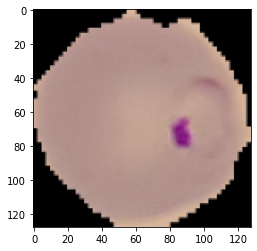

In [24]:
plt.imshow(X_train[0].reshape(128, 128, 3))

In [30]:
X_train.max()

255